### 从雪球读取股票的历年营收与利润，并生成图表

我们通过requests来获取雪球个股的财报接口，取到json格式的数据，
通过pandas解析，来看个股逐年的营收和理论的变化，
该代码修改symbol（股票代码）变量，即可查看个股图表：

<IPython.core.display.Javascript object>


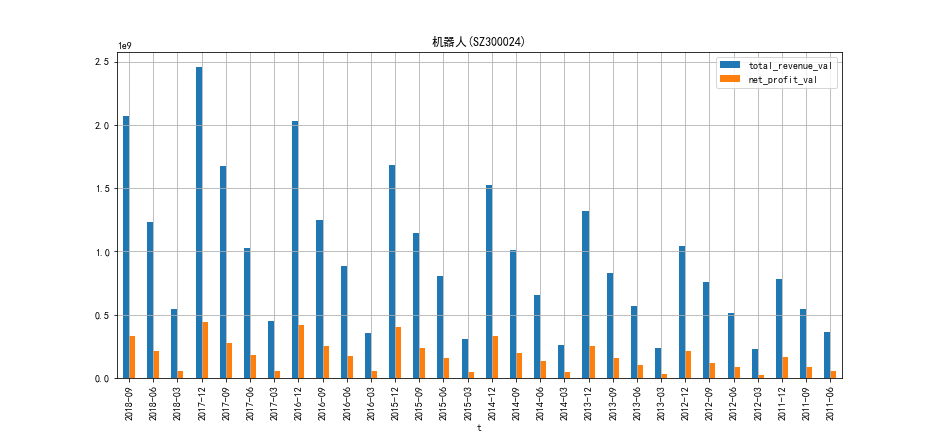

In [251]:
import requests,time
import matplotlib.pyplot as plt
# 生成的图表x轴较长，设置下图像的尺寸
plt.rcParams['figure.figsize'] = (13.0, 6.0) 
# 用于正常显示中文标签
plt.rcParams["font.sans-serif"]=['SimHei']  
#输入股票代码
symbol = "300024"
symbol= "SZ"+symbol if symbol[0] in ["0", "3"] else "SH"+symbol
period_count = 30
url = "https://stock.xueqiu.com/v5/stock/finance/cn/income.json?" \
        "symbol={}&type=all&is_detail=true&count={}&timestamp=1551920790723".\
        format(symbol, period_count)
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 " \
    "(KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36",
    "Cookie":"xqat=b7976bbc7c727d829c190880008ddad3d44333e1;",
}
data = requests.get(url, headers = header)
data = pd.read_json(data.text, dtype=False, orient='records')
title = data['data']['quote_name'] + '({})'.format(symbol)
fin = pd.DataFrame(data['data']['list'])
# 提取营业收入数据
fin['total_revenue_val'] = fin[['total_revenue']].apply(lambda x : x[0][0], axis = 1)
# 提取净利润数据
fin['net_profit_val'] = fin[['net_profit']].apply(lambda x : x[0][0], axis = 1)
# 提取转化时间
fin['t'] = fin[['report_date']].apply(lambda x : time.strftime('%Y-%m', time.localtime(x[0]/1000)), axis = 1)
# 输出柱状图
fin[['t', 'total_revenue_val','net_profit_val']].plot(x='t', kind='bar',title=title, grid=True)
